# The Sparks Foundation
# Data Science and Business Analytics Internship (GRIP September 2023)
# - Anisha Walde
# Task 2 : Prediction using Unupervised ML
To predict the optimum number of clusters in the 'Iris' dataset and represent it visually using unsupervised machine learning

In [24]:
# importing  libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [26]:
# Load the Iris dataset
data = pd.read_csv('Iris.csv')

In [27]:
# Display the first few rows of the dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [29]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [30]:
data.index

RangeIndex(start=0, stop=150, step=1)

In [31]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [32]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [33]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# 1.Determine the optimum number of clusters using the Elbow method:

The Elbow method helps to find the optimal number of clusters by plotting the sum of squared distances (inertia) for different values of k (number of clusters) and looking for an "elbow" point where the inertia starts to decrease at a slower rate.

In [35]:
# clusters using the Elbow method

wcss = []  # Within-cluster sum of squares
X = data.iloc[:, :-1]  # Assuming the target variable is in the last column

In [36]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


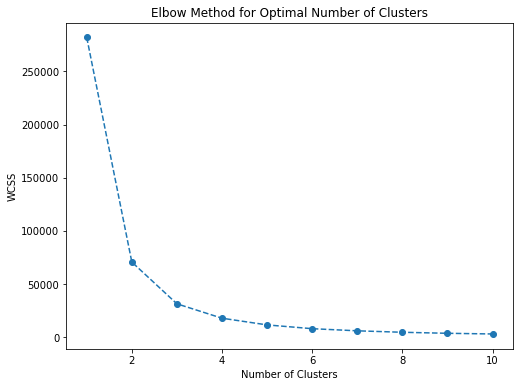

In [37]:
# Plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  
plt.show()

# 2. Perform K-Means clustering with the optimal number of clusters (k=3):

In [38]:
# Applying K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Adding cluster labels to the dataset
data['Cluster'] = kmeans.labels_

In [39]:
# Display the first few rows of the dataset with cluster labels
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [40]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1
149,150,5.9,3.0,5.1,1.8,Iris-virginica,1


In [41]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [42]:
data.index

RangeIndex(start=0, stop=150, step=1)

# 3. Visualize the clusters:

Use a scatterplot to visualize the data points with different colors representing the clusters.

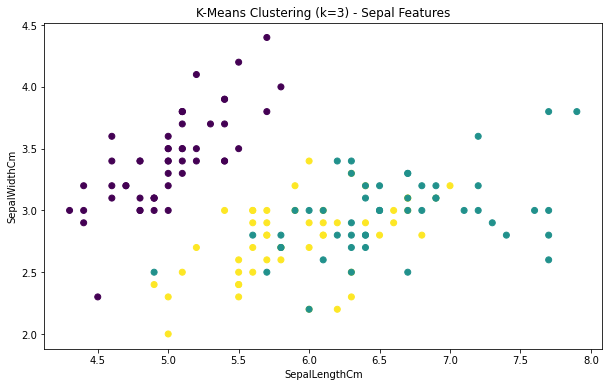

In [43]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering (k=3) - Sepal Features')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

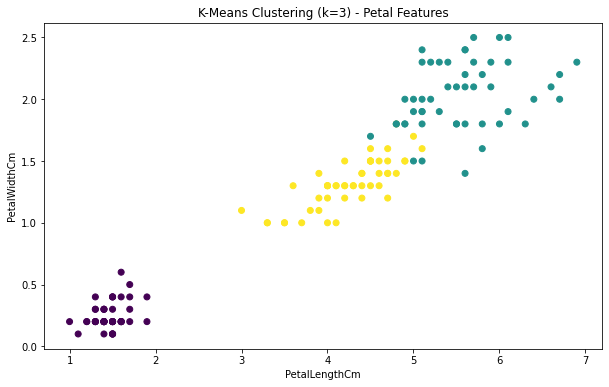

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering (k=3) - Petal Features')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

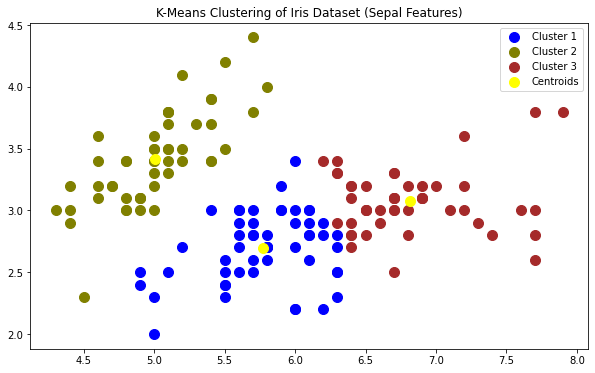

In [47]:
X = data[['SepalLengthCm', 'SepalWidthCm']].values  # Change these columns as needed

# Initialize KMeans with specified parameters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='Olive', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='brown', label='Cluster 3')

# Plot the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('K-Means Clustering of Iris Dataset (Sepal Features)')
plt.legend()
plt.show()

Thank You 